In [11]:
import pandas as pd
import re

# 1️ Cargar el CSV
df = pd.read_csv('Tweets.csv', encoding='latin-1')

# 2️ Mostrar los nombres de las columnas (para verificar)
print("Columnas del CSV:", df.columns.tolist())

# 3️ Función para limpiar texto
def remove_especial_text(row):
    if isinstance(row, str):  # Verifica que sea texto
        # Eliminar números
        row = re.sub(r'\d+', '', row)
        # Eliminar signos de puntuación y símbolos especiales
        row = re.sub(r'[^\w\s]', '', row)
        # Pasar todo a minúsculas
        row = row.lower()
        # Quitar espacios extra
        row = ' '.join(row.split())
        return row
    else:
        return ""  # Si el valor no es texto

# 4️ Aplicar la función a la columna 'text'
df["processed_text"] = df["text"].apply(remove_especial_text)

# 5️ Mostrar una vista previa de los resultados
df



Columnas del CSV: ['textID', 'text', 'selected_text', 'sentiment']


,textID,text,selected_text,sentiment,processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband los...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,ive wondered about rake to the client has made...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you p...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it


## tokenizar

In [12]:
df["tokenization"] = df["processed_text"].str.split(" ")
df[["tokenization"]]

,tokenization
0,"[id, have, responded, if, i, were, going]"
1,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,"[my, boss, is, bullying, me]"
3,"[what, interview, leave, me, alone]"
4,"[sons, of, why, couldnt, they, put, them, on, ..."
...,...
27476,"[wish, we, could, come, see, u, on, denver, hu..."
27477,"[ive, wondered, about, rake, to, the, client, ..."
27478,"[yay, good, for, both, of, you, enjoy, the, br..."
27479,"[but, it, was, worth, it]"


## AGREGAR LEMATIZAR

pip install spacy - modelo

python -m spacy download es_core_news_sm --modelo en ingles para poder lematizar

In [13]:
import spacy

# 2️ Cargar modelo spaCy en español
nlp = spacy.load('en_core_web_sm')

#  Función para lematizar texto
def lemmatize_text(text):
    doc = nlp(text)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

# 5️ Aplicar preprocesamiento
df = pd.read_csv('Tweets.csv', encoding='latin-1')
df["processed_text"] = df["text"].apply(remove_especial_text)
df["lemmatized_text"] = df["processed_text"].apply(lemmatize_text)

# 6️ Ver algunos resultados
df

,textID,text,selected_text,sentiment,processed_text,lemmatized_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id have responded if i were going,I d have respond if I be go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad i will miss you here in san diego,sooo sad I will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,my boss be bully I
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,what interview leave I alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons of why couldnt they put them on the relea...,son of why could not they put they on the rele...
...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,wish we could come see u on denver husband los...,wish we could come see u on denver husband los...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,ive wondered about rake to the client has made...,I ve wonder about rake to the client have make...
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,yay good for both of you enjoy the break you p...,yay good for both of you enjoy the break you p...
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,but it was worth it,but it be worth it


## Nube de palabras

Index(['textID', 'text', 'selected_text', 'sentiment', 'processed_text',
       'lemmatized_text'],
      dtype='object')


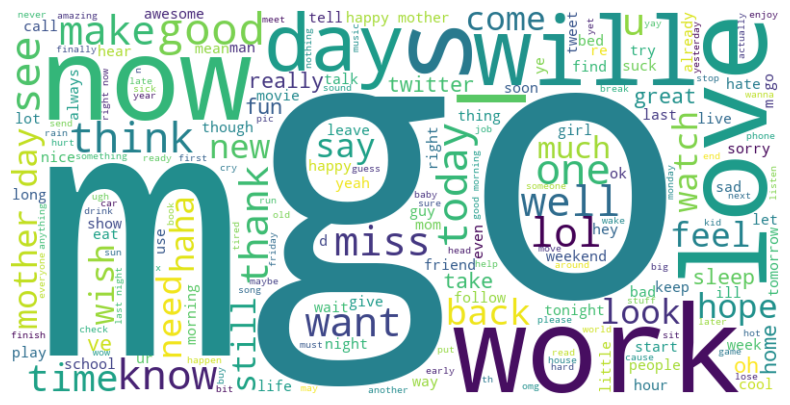

In [14]:
# 1. Verifica las columnas actuales
print(df.columns)

# 2. Si no existe 'lemmatized_text', crea la columna:
df["lemmatized_text"] = df["processed_text"].apply(lemmatize_text)

# 3. Genera la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Entrenamiento de Modelo (Regresion Logistica - Multinomial)

Columnas: ['textID', 'text', 'selected_text', 'sentiment', 'processed_text', 'lemmatized_text']
Clases de sentiment (ejemplos): sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64
Mapping etiquetas -> números: {'negative': 0, 'neutral': 1, 'positive': 2}

Entrenando LogisticRegression ...
LogisticRegression -> Accuracy: 0.6940  Precision: 0.7054  Recall: 0.6940  F1: 0.6940

Classification report:
              precision    recall  f1-score   support

    negative       0.74      0.60      0.66      1556
     neutral       0.63      0.77      0.69      2224
    positive       0.77      0.69      0.73      1717

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.71      0.69      0.69      5497


Entrenando MultinomialNB ...
MultinomialNB -> Accuracy: 0.6345  Precision: 0.6624  Recall: 0.6345  F1: 0.6318

Classification report:
              precision    recall  f1-score   

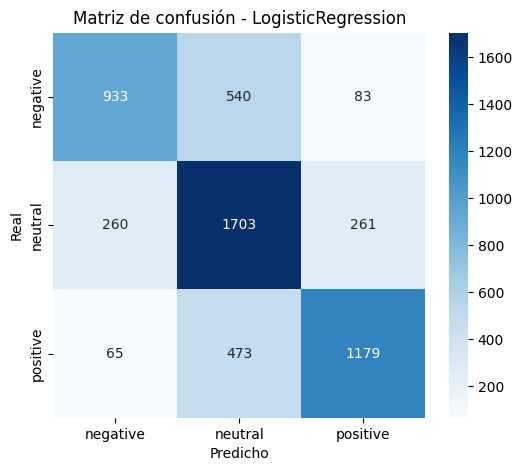

In [15]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS

# --- 0) Datos ---
# Se asume que ya existe 'df' con 'lemmatized_text' y 'sentiment'
# Si no, puedes recargarlo:
# df = pd.read_csv('Tweets.csv', encoding='latin-1')

print("Columnas:", df.columns.tolist())
print("Clases de sentiment (ejemplos):", df['sentiment'].value_counts())

# --- 1) Preparar X e y ---
X = df['lemmatized_text'].fillna('')
y = df['sentiment'].fillna('neutral')

# --- 2) Eliminar stopwords (en inglés) ---
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in STOP_WORDS])

X = X.apply(remove_stopwords)

# --- 3) Codificar etiquetas ---
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Mapping etiquetas -> números:", dict(zip(le.classes_, range(len(le.classes_)))))

# --- 4) Dividir en train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# --- 5) Vectorizar texto (TF-IDF) ---
# Ya no pasamos stop_words='english' porque ya las eliminamos manualmente con spaCy
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- 6) Entrenar y evaluar modelos ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "MultinomialNB": MultinomialNB()
}

results = {}
for name, model in models.items():
    print(f"\nEntrenando {name} ...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"{name} -> Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    results[name] = {"model": model, "y_pred": y_pred, "metrics": (acc, prec, rec, f1)}

# --- 7) Matriz de confusión (mejor modelo) ---
best_name = max(results, key=lambda k: results[k]["metrics"][3])  # elegir por F1-score
best_pred = results[best_name]["y_pred"]
print(f"\n✅ Mejor modelo según F1: {best_name}")

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title(f'Matriz de confusión - {best_name}')
plt.show()


Columnas disponibles: ['textID', 'text', 'selected_text', 'sentiment', 'processed_text', 'lemmatized_text']
Mapping etiquetas -> números: {'negative': 0, 'neutral': 1, 'positive': 2}

Entrenando LinearSVC (sin GridSearch)...

=== METRICAS LinearSVC ===
Accuracy:  0.6724
Precision: 0.6758
Recall:    0.6724
F1-score:  0.6728

Classification report:

              precision    recall  f1-score   support

    negative       0.69      0.62      0.65      1556
     neutral       0.62      0.69      0.65      2224
    positive       0.73      0.70      0.71      1717

    accuracy                           0.67      5497
   macro avg       0.68      0.67      0.67      5497
weighted avg       0.68      0.67      0.67      5497



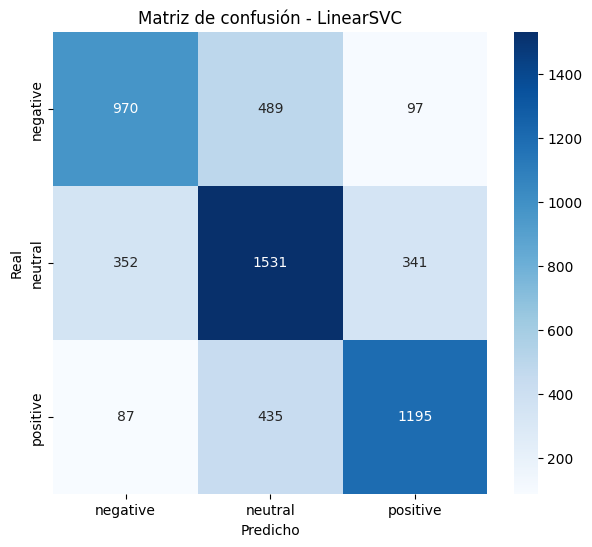


Iniciando GridSearchCV (LinearSVC - ajuste de C)... esto puede tardar un poco
Fitting 4 folds for each of 8 candidates, totalling 32 fits

Mejor combo encontrado: {'svc__C': 0.1, 'tfidf__max_features': 5000}
GridSearch -> Accuracy: 0.6960 | F1-weighted: 0.6956

Classification report (GridSearch):

              precision    recall  f1-score   support

    negative       0.76      0.59      0.66      1556
     neutral       0.63      0.78      0.69      2224
    positive       0.77      0.69      0.73      1717

    accuracy                           0.70      5497
   macro avg       0.72      0.68      0.69      5497
weighted avg       0.71      0.70      0.70      5497



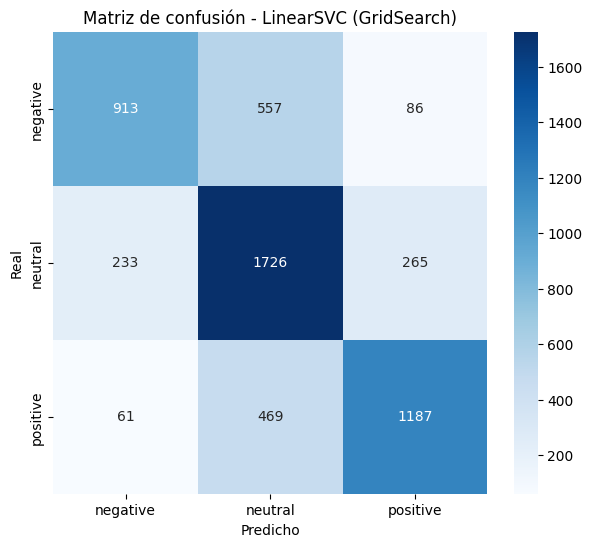


Modelos guardados: best_svm_model.pkl, label_encoder.pkl


In [16]:
# SVM text classification (LinearSVC) - procesamiento + evaluación
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS
import joblib  # opcional, para guardar el modelo

# ---------------------------------------
# 0) Si necesitas recargar el df, descomenta:
# df = pd.read_csv('Tweets.csv', encoding='latin-1')
# ---------------------------------------

print("Columnas disponibles:", df.columns.tolist())
assert 'lemmatized_text' in df.columns and 'sentiment' in df.columns, \
    "El DataFrame debe tener 'lemmatized_text' y 'sentiment'."

# ---------------------------------------
# 1) Eliminar stopwords en inglés (sobre lemmatized_text)
# ---------------------------------------
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    return " ".join([w for w in text.split() if w.lower() not in STOP_WORDS])

df['text_nostop'] = df['lemmatized_text'].fillna('').apply(remove_stopwords)

# ---------------------------------------
# 2) Preparar X, y y codificar etiquetas
# ---------------------------------------
X = df['text_nostop']
y = df['sentiment'].fillna('neutral')

le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Mapping etiquetas -> números:", dict(zip(le.classes_, range(len(le.classes_)))))

# ---------------------------------------
# 3) División train/test (estratificada)
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ---------------------------------------
# 4) Pipeline TF-IDF + LinearSVC (sin GridSearch: entrenamiento directo)
# ---------------------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2), sublinear_tf=True)),
    ('svc', LinearSVC(max_iter=10000, random_state=42, class_weight=None))
])

print("\nEntrenando LinearSVC (sin GridSearch)...")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# ---------------------------------------
# 5) Métricas
# ---------------------------------------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n=== METRICAS LinearSVC ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}\n")
print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# ---------------------------------------
# 6) Matriz de confusión
# ---------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - LinearSVC")
plt.show()

# ---------------------------------------
# 7) (Opcional) GridSearchCV para ajustar C
# ---------------------------------------
do_grid = True  # cambia a False si no quieres búsqueda de hiperparámetros
if do_grid:
    print("\nIniciando GridSearchCV (LinearSVC - ajuste de C)... esto puede tardar un poco")
    param_grid = {
        'tfidf__max_features': [3000, 5000],
        'svc__C': [0.01, 0.1, 1, 10]
    }
    gs = GridSearchCV(pipeline, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print("\nMejor combo encontrado:", gs.best_params_)
    best_model = gs.best_estimator_
    y_pred_gs = best_model.predict(X_test)

    acc_gs = accuracy_score(y_test, y_pred_gs)
    f1_gs = f1_score(y_test, y_pred_gs, average='weighted', zero_division=0)
    print(f"GridSearch -> Accuracy: {acc_gs:.4f} | F1-weighted: {f1_gs:.4f}")
    print("\nClassification report (GridSearch):\n")
    print(classification_report(y_test, y_pred_gs, target_names=le.classes_, zero_division=0))

    # Matriz confusión mejor modelo
    cm_gs = confusion_matrix(y_test, y_pred_gs)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm_gs, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.title("Matriz de confusión - LinearSVC (GridSearch)")
    plt.show()
else:
    best_model = pipeline

# ---------------------------------------
# 8) (Opcional) Guardar el mejor modelo y el label encoder
# ---------------------------------------
save_model = True
if save_model:
    joblib.dump(best_model, "best_svm_model.pkl")
    joblib.dump(le, "label_encoder.pkl")
    print("\nModelos guardados: best_svm_model.pkl, label_encoder.pkl")
